In [2]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('data/Titanic_Cleaned.csv')
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,1,0.0,3,1,0,False,0,0,True,False,True,False,True,False,False
1,2,1.0,1,1,0,True,3,3,False,False,False,False,False,True,False
2,3,1.0,3,0,0,False,1,1,False,False,True,True,False,False,False
3,4,1.0,1,1,0,True,2,3,False,False,True,False,False,True,False
4,5,0.0,3,0,0,False,2,1,True,False,True,False,True,False,False


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Survived      891 non-null    float64
 2   Pclass        1309 non-null   int64  
 3   SibSp         1309 non-null   int64  
 4   Parch         1309 non-null   int64  
 5   HasCabin      1309 non-null   bool   
 6   CatAge        1309 non-null   int64  
 7   CatFare       1309 non-null   int64  
 8   Sex_male      1309 non-null   bool   
 9   Embarked_Q    1309 non-null   bool   
 10  Embarked_S    1309 non-null   bool   
 11  Title_Miss    1309 non-null   bool   
 12  Title_Mr      1309 non-null   bool   
 13  Title_Mrs     1309 non-null   bool   
 14  Title_Unique  1309 non-null   bool   
dtypes: bool(8), float64(1), int64(6)
memory usage: 81.9 KB


,PassengerId,Survived,Pclass,SibSp,Parch,CatAge,CatFare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,0.498854,0.385027,1.381207,1.486631
std,378.020061,0.486592,0.837836,1.041658,0.865560,1.112474,1.122135
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,655.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000
75%,982.000000,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000
max,1309.000000,1.000000,3.000000,8.000000,9.000000,3.000000,3.000000


In [5]:
# Split the dataset
df_train = df[df['Survived'].notnull()]
df_test = df[df['Survived'].isnull()]

# Reset index (optional)
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Check the shapes
print(f"Training set shape: {df_train.shape}")
print(f"Test set shape: {df_test.shape}")

Training set shape: (891, 15)
Test set shape: (418, 15)


In [6]:
# Save the test and train data as csv files so that it is easier to load them in the future
df_test.to_csv('data/test.csv', index=False)
df_train.to_csv('data/train.csv', index=False)

In [7]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,1,0.0,3,1,0,False,0,0,True,False,True,False,True,False,False
1,2,1.0,1,1,0,True,3,3,False,False,False,False,False,True,False
2,3,1.0,3,0,0,False,1,1,False,False,True,True,False,False,False
3,4,1.0,1,1,0,True,2,3,False,False,True,False,False,True,False
4,5,0.0,3,0,0,False,2,1,True,False,True,False,True,False,False


In [9]:
df_test.head()

,PassengerId,Survived,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,892,NaN,3,0,0,False,2,0,True,True,False,False,True,False,False
1,893,NaN,3,1,0,False,3,0,False,False,True,False,False,True,False
2,894,NaN,2,0,0,False,3,1,True,True,False,False,True,False,False
3,895,NaN,3,0,0,False,1,1,True,False,True,False,True,False,False
4,896,NaN,3,1,1,False,0,1,False,False,True,False,False,True,False


In [10]:
# Create 'TravelAlone' feature
df_train['TravelAlone'] = np.where((df_train['SibSp'] + df_train['Parch']) > 0, 0, 1)

# Alternative method
# df_train['TravelAlone'] = ((df_train['SibSp'] + df_train['Parch']) == 0).astype(int)

# View the new feature
df_train[['SibSp', 'Parch', 'TravelAlone']].head()

,SibSp,Parch,TravelAlone
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [11]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'HasCabin',
       'CatAge', 'CatFare', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Unique', 'TravelAlone'],
      dtype='object')

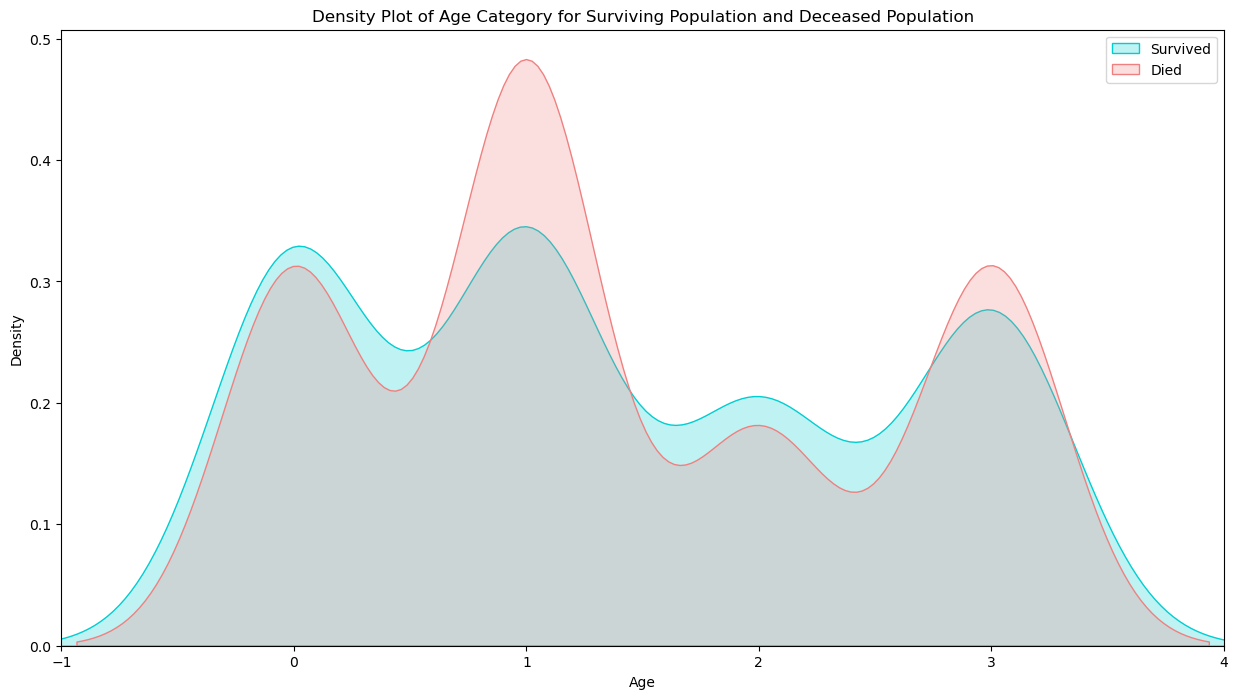

In [12]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["CatAge"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["CatAge"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age Category for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-1,4)
plt.show()

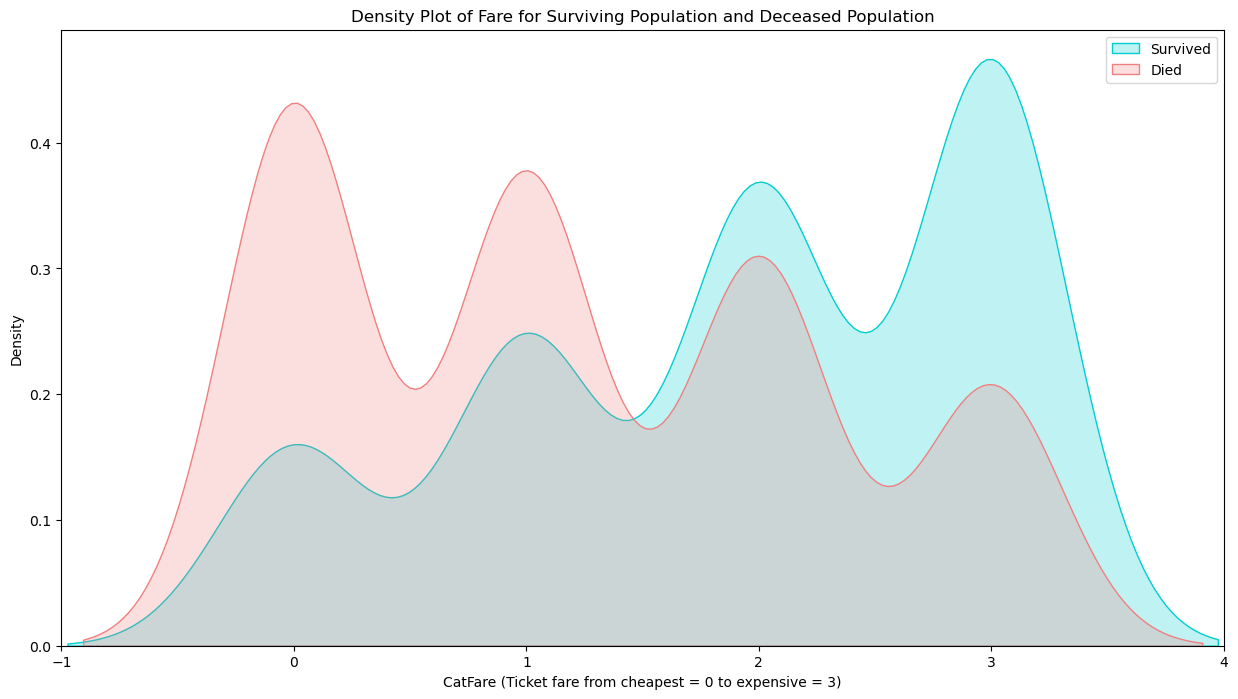

In [13]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["CatFare"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["CatFare"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='CatFare (Ticket fare from cheapest = 0 to expensive = 3)')
plt.xlim(-1,4)
plt.show()

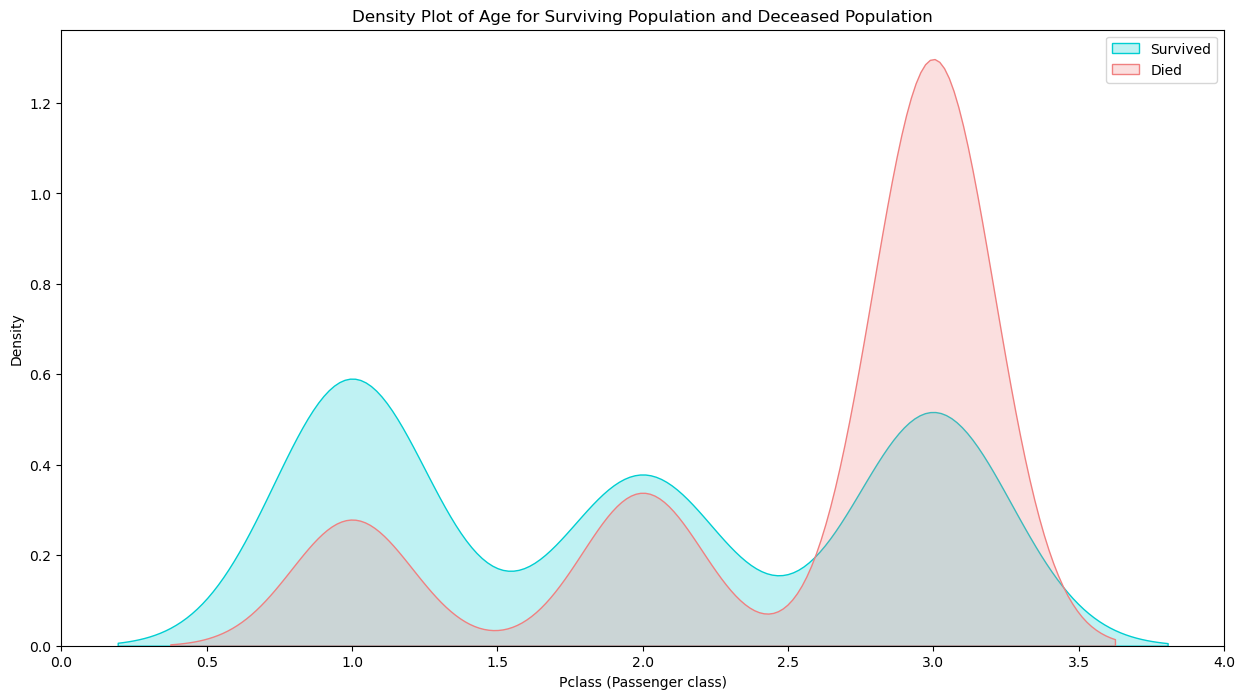

In [14]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Pclass"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Pclass"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Pclass (Passenger class)')
plt.xlim(0,4)
plt.show()

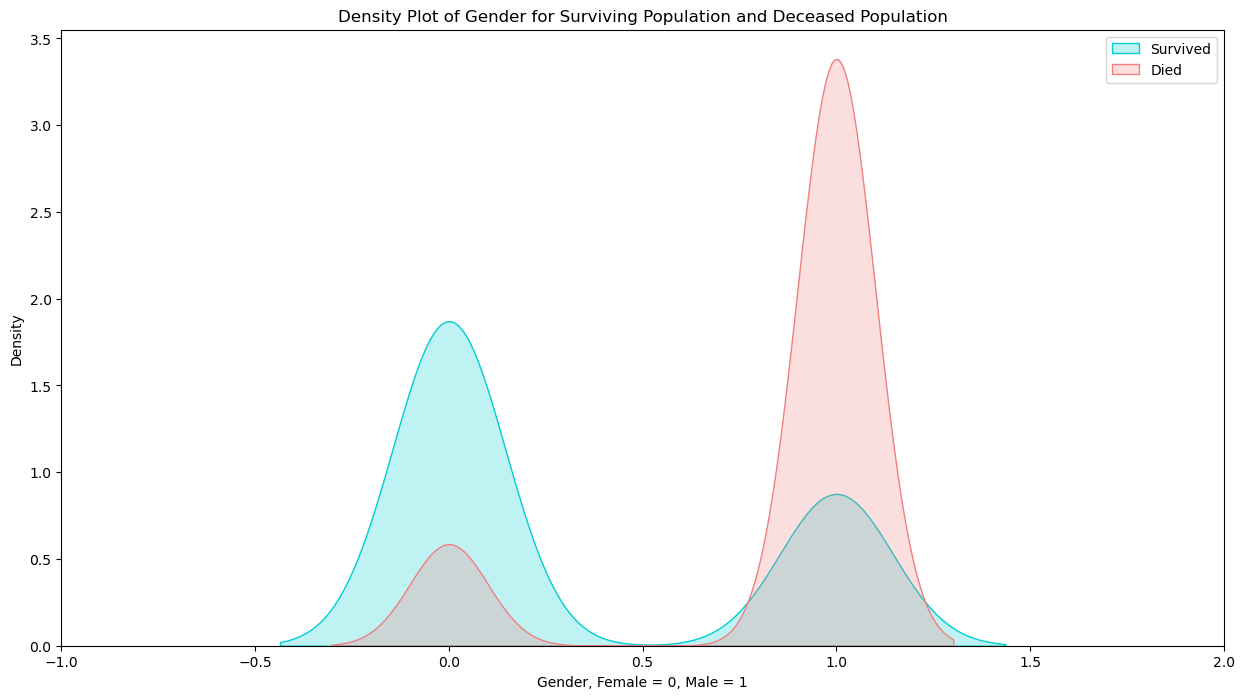

In [15]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Sex_male"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Sex_male"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Gender for Surviving Population and Deceased Population')
ax.set(xlabel='Gender, Female = 0, Male = 1')
plt.xlim(-1,2)
plt.show()

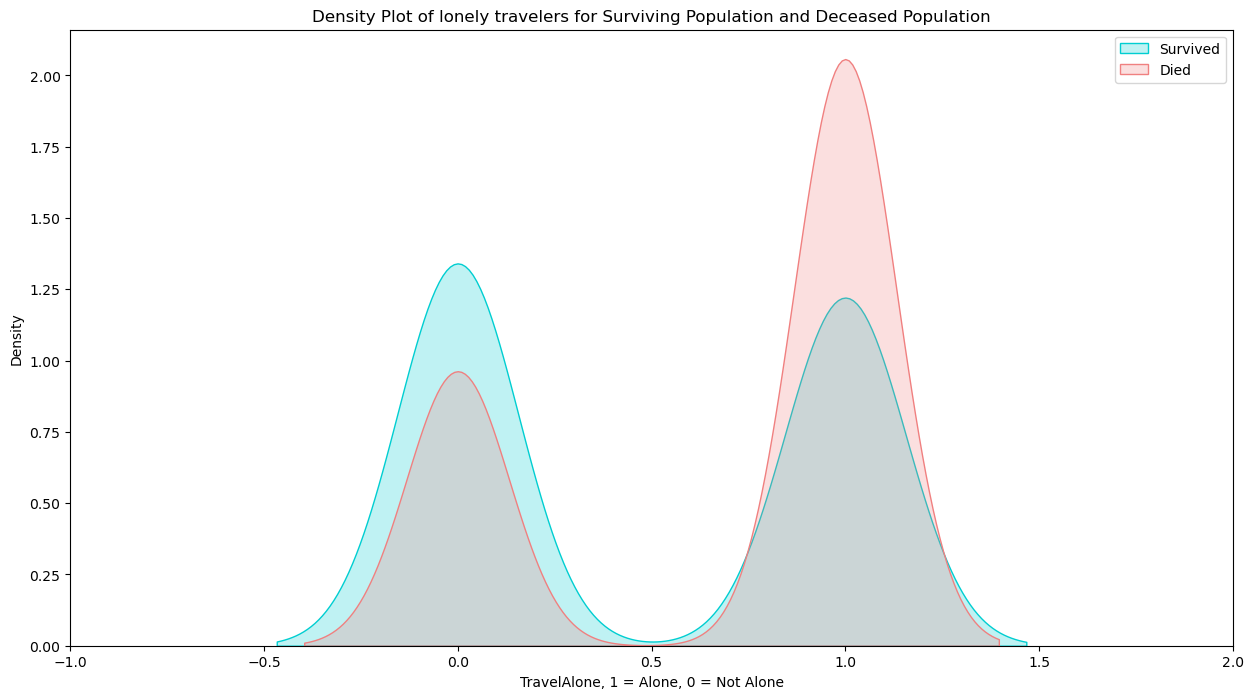

In [16]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["TravelAlone"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["TravelAlone"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of lonely travelers for Surviving Population and Deceased Population')
ax.set(xlabel='TravelAlone, 1 = Alone, 0 = Not Alone')
plt.xlim(-1,2)
plt.show()

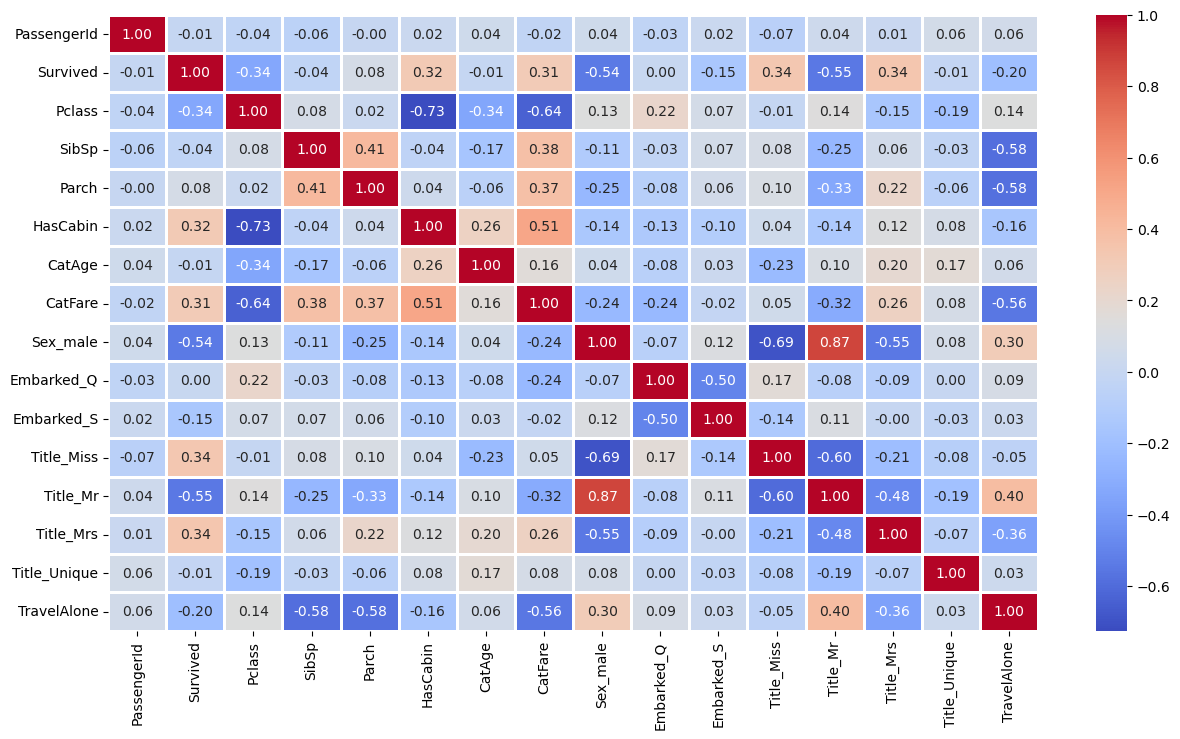

In [17]:
# Correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()

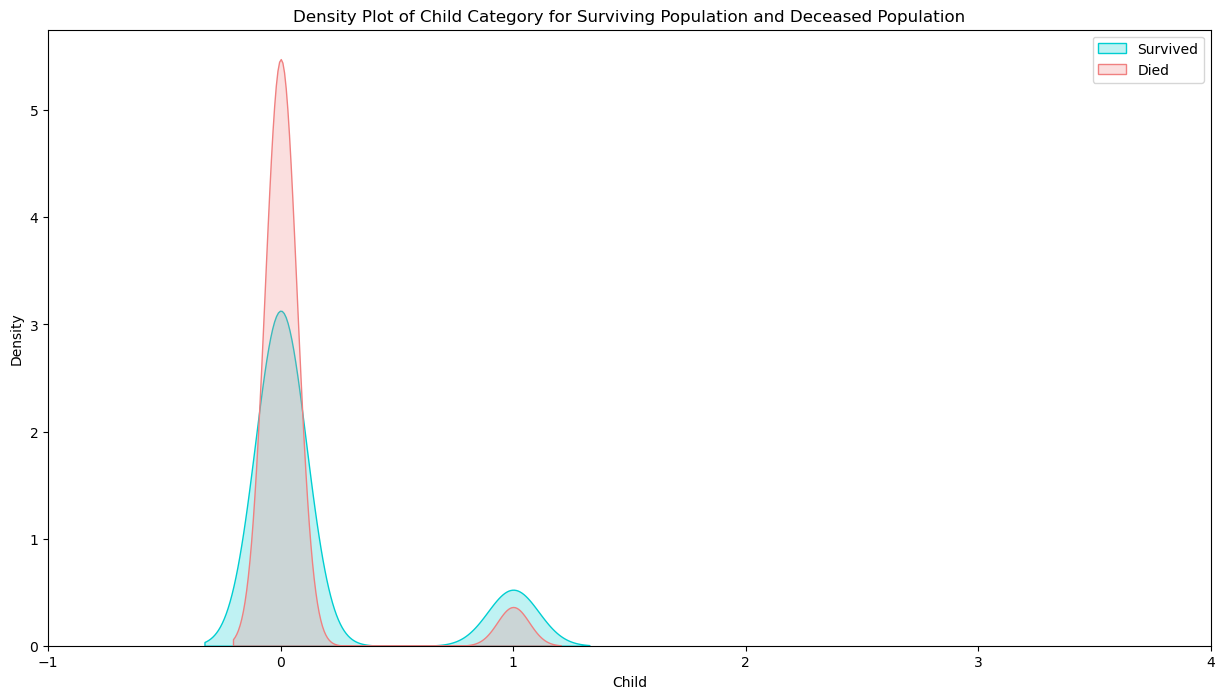

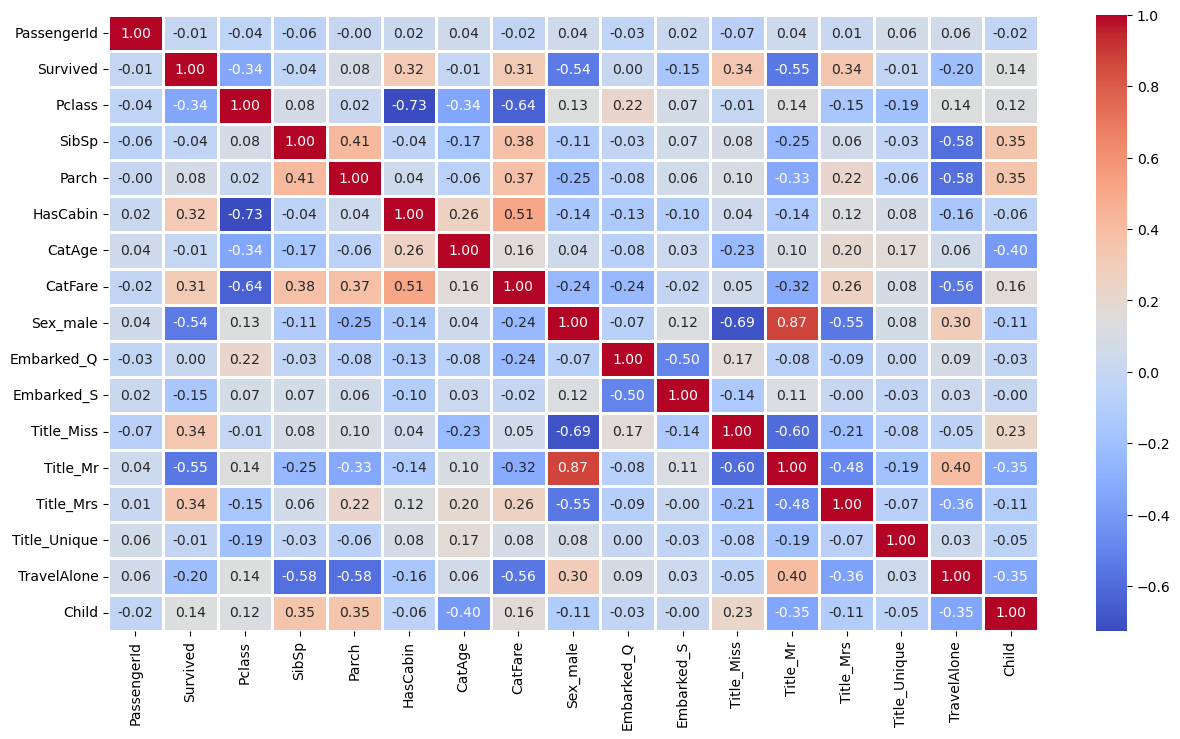

In [ ]:

# Getting the age from the previous lab's data
old_df = pd.read_csv('../Lab2/data/Titanic.csv')

# Extract the age column from old_df
age = old_df['Age']

#Fill missing values - we'll use the median since the data is right skewed.
age.fillna(age.median(), inplace=True)

# Insert Age back into train_df
df_train['Age'] = age

# Create age column where age is less than 16
df_train.loc[:, 'Child'] = np.where(df_train['Age'] < 16, 1, 0)

# Drop the 'Age' column as it is no longer needed
df_train.drop('Age', axis=1, inplace=True)

# View survival rate of new feature, child
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Child"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Child"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Child Category for Surviving Population and Deceased Population')
ax.set(xlabel='Child')
plt.xlim(-1,4)
plt.show()

# Correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()


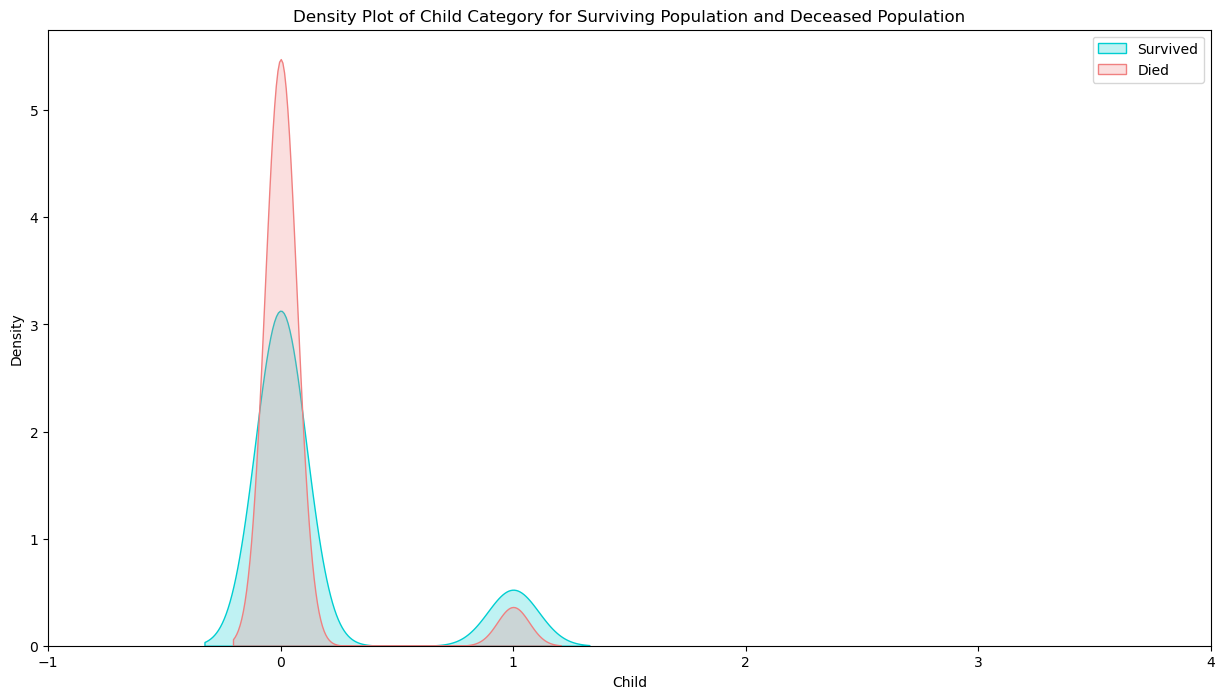

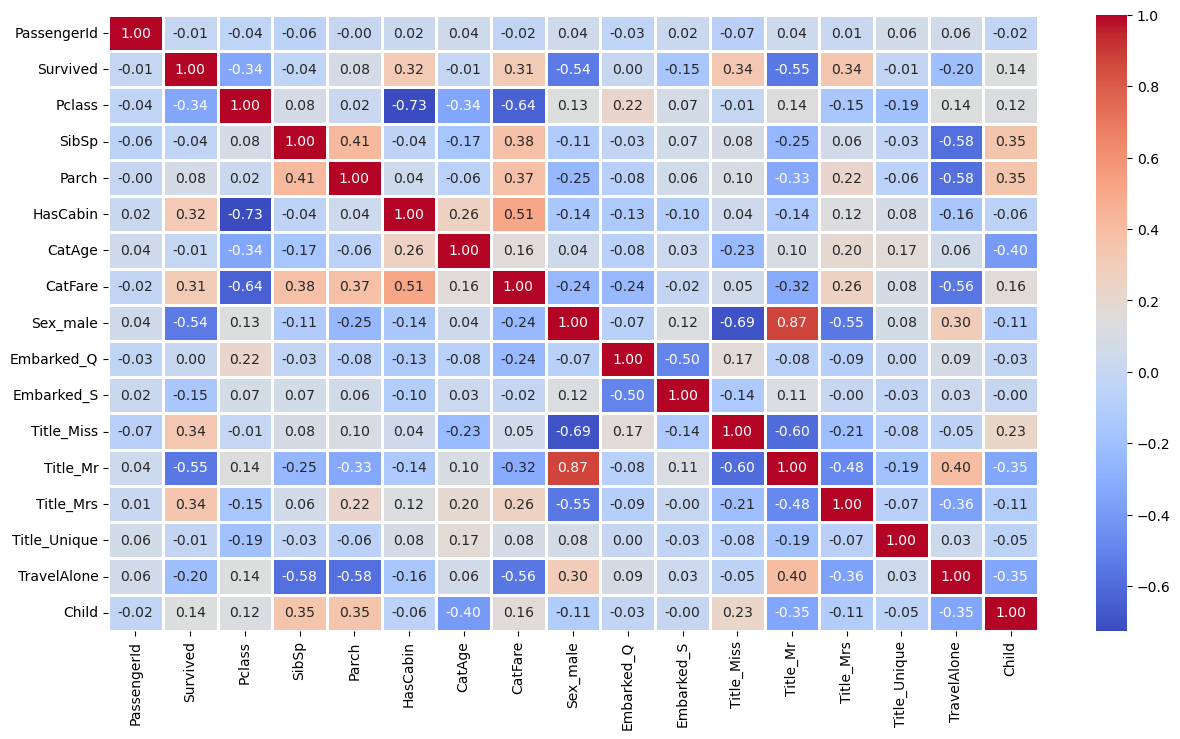

In [21]:
# Getting the age from the previous lab's data
old_df = pd.read_csv('../Lab2/data/Titanic.csv')

# Extract the age column from old_df
age = old_df['Age']

#Fill missing values - we'll use the median since the data is right skewed.
age.fillna(age.median(), inplace=True)

# Insert Age back into train_df
df_train['Age'] = age

# Create age column where age is less than 16
df_train.loc[:, 'Child'] = np.where(df_train['Age'] < 16, 1, 0)

# Drop the 'Age' column as it is no longer needed
df_train.drop('Age', axis=1, inplace=True)

# View survival rate of new feature, child
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Child"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Child"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Child Category for Surviving Population and Deceased Population')
ax.set(xlabel='Child')
plt.xlim(-1,4)
plt.show()

# Correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()

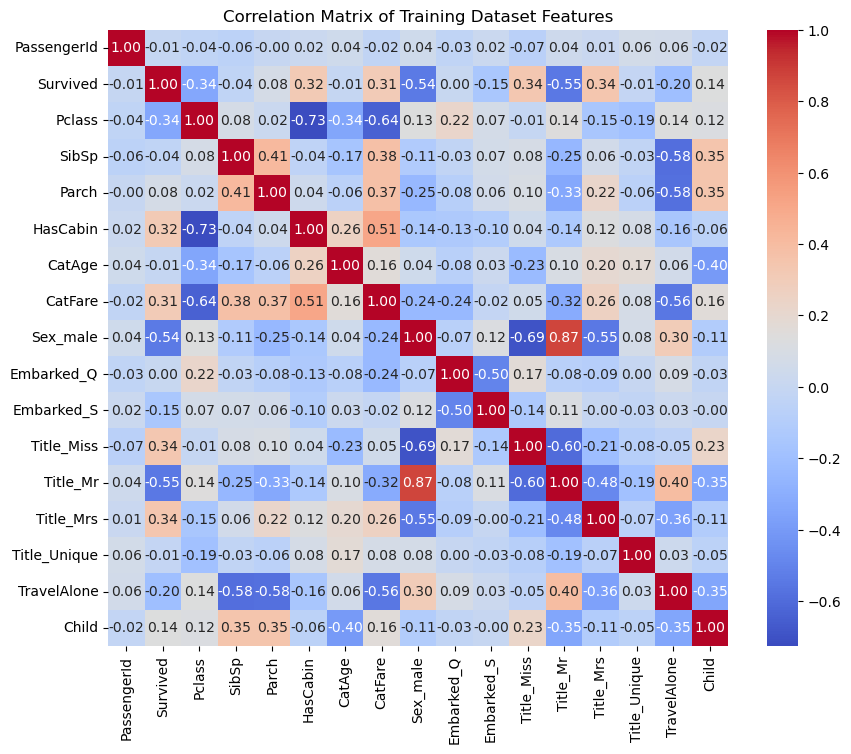

In [23]:
# Compute correlation matrix
correlation_matrix = df_train.corr()

#Visualize the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Training Dataset Features')
plt.show()

In [24]:
# 1. Prepare the data
X = df_train.drop(['PassengerId', 'Survived'], axis=1)
y = df_train['Survived']

# If there are categorical variables, make sure to encode them appropriately
# For example:
# X = pd.get_dummies(X, drop_first=True)

# 2. Initialize the model
model = LogisticRegression(max_iter=1000)

# 3. Perform RFE
rfe = RFE(estimator=model, n_features_to_select=8)
rfe.fit(X, y)

# 4. List the selected features
selected_features = X.columns[rfe.support_]
print('Selected features:', selected_features)

Selected features: Index(['Pclass', 'SibSp', 'HasCabin', 'Sex_male', 'Title_Mr', 'Title_Mrs',
       'Title_Unique', 'Child'],
      dtype='object')


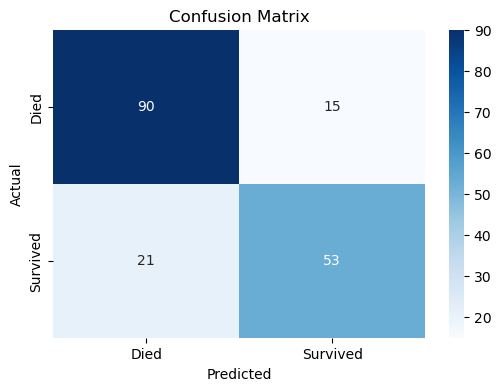

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       105
         1.0       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# 1. Split the data
X = df_train[selected_features]
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 3. Make predictions
y_pred = model.predict(X_test)

# 4. Evaluate the model
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

Accuracy: 0.80
Log Loss: 0.42
AUC: 0.88


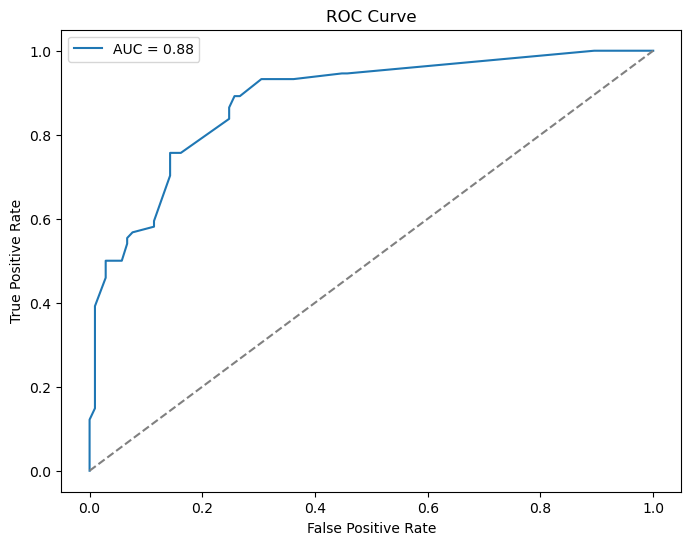

In [26]:
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, roc_curve

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Log Loss
y_pred_proba = model.predict_proba(X_test)[:,1]
logloss = log_loss(y_test, y_pred_proba)
print(f'Log Loss: {logloss:.2f}')

# AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC: {auc:.2f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [27]:
from sklearn.model_selection import cross_val_score

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Accuracy
scores_accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(f'Average Accuracy: {scores_accuracy.mean():.2f}')

# Log Loss
scores_log_loss = cross_val_score(model, X, y, cv=10, scoring='neg_log_loss')
print(f'Average Log Loss: {-scores_log_loss.mean():.2f}')

# AUC
scores_auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
print(f'Average AUC: {scores_auc.mean():.2f}')

Average Accuracy: 0.82
Average Log Loss: 0.43
Average AUC: 0.87
